# EDA — Rossmann Demand Forecasting

**Goal:** Explore the Rossmann Store Sales dataset to understand sales patterns, missing values, seasonal trends, and key features for forecasting.

**Contents:**
1. Load Data
2. Data Overview
3. Missing Value Analysis
4. Sales Trends
5. Store-level Analysis
6. Impact of Promotions & Holidays
7. Summary of Insights


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [5]:
train = pd.read_csv("D:\\Projects\\Demand forecasting for inventory optimization\\data\\raw\\train.csv", parse_dates=["Date"])
stores = pd.read_csv("D:\\Projects\\Demand forecasting for inventory optimization\\data\\raw\\store.csv")
test = pd.read_csv("D:\\Projects\\Demand forecasting for inventory optimization\\data\\raw\\test.csv", parse_dates=["Date"])

C:\Users\AWANTI GIRADKAR\AppData\Local\Temp\ipykernel_12432\3304458416.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("D:\\Projects\\Demand forecasting for inventory optimization\\data\\raw\\train.csv", parse_dates=["Date"])


In [6]:
print(train.shape, stores.shape, test.shape)
train.head()

(1017209, 9) (1115, 10) (41088, 8)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
train = train.merge(stores, on="Store", how="left")
test = test.merge(stores, on="Store", how="left")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [11]:
train.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870


In [12]:
missing = train.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]
missing

Promo2SinceWeek              0.499436
PromoInterval                0.499436
Promo2SinceYear              0.499436
CompetitionOpenSinceYear     0.317878
CompetitionOpenSinceMonth    0.317878
CompetitionDistance          0.002597
dtype: float64

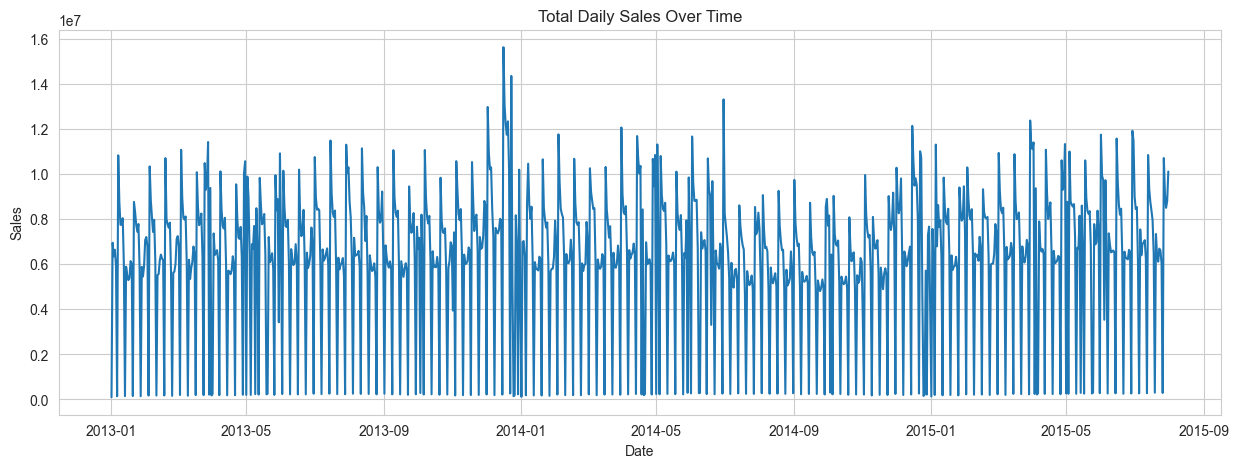

In [13]:
plt.figure(figsize=(15,5))
daily_sales = train.groupby("Date")["Sales"].sum()
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

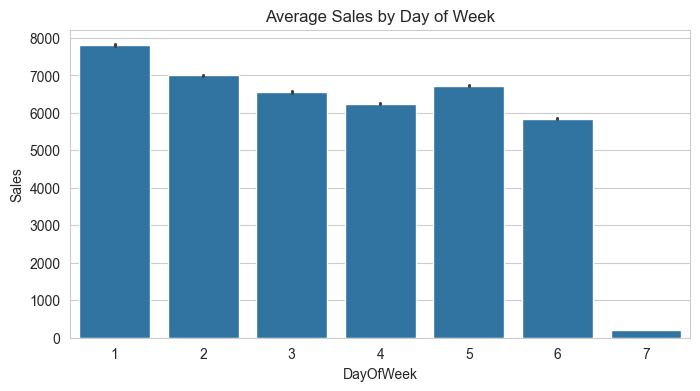

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(x="DayOfWeek", y="Sales", data=train)
plt.title("Average Sales by Day of Week")
plt.show()

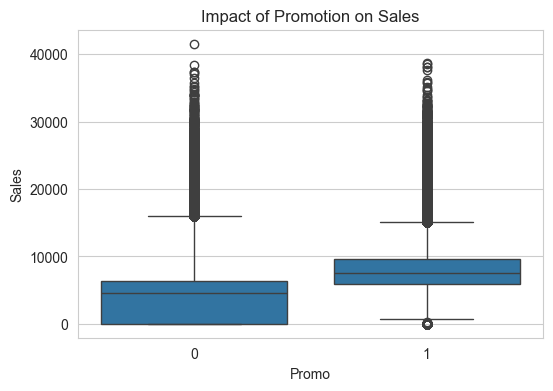

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Promo", y="Sales", data=train)
plt.title("Impact of Promotion on Sales")
plt.show()

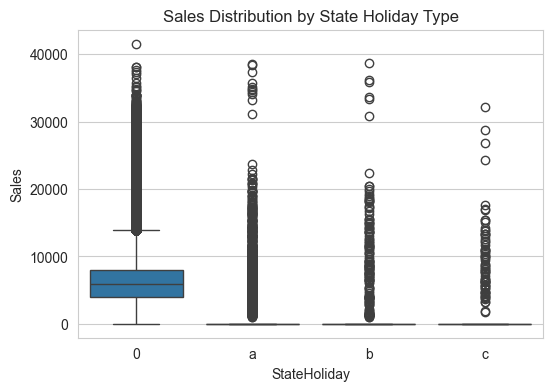

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="StateHoliday", y="Sales", data=train)
plt.title("Sales Distribution by State Holiday Type")
plt.show()

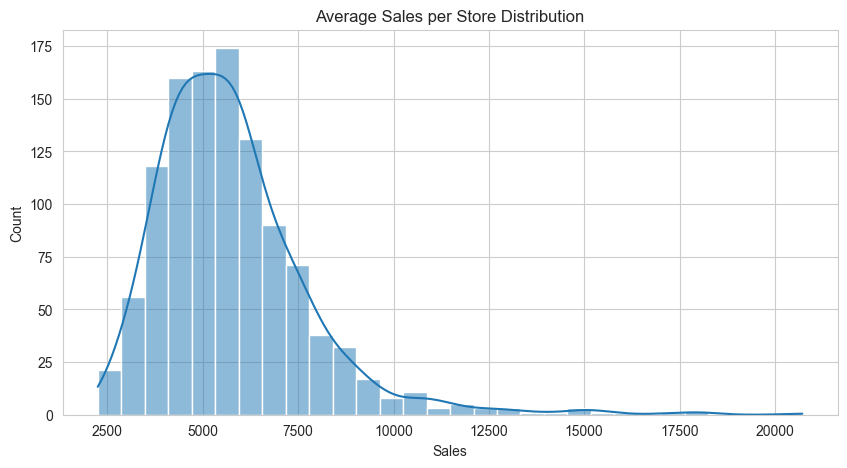

In [17]:
plt.figure(figsize=(10,5))
avg_sales_per_store = train.groupby("Store")["Sales"].mean()
sns.histplot(avg_sales_per_store, bins=30, kde=True)
plt.title("Average Sales per Store Distribution")
plt.show()

In [21]:
from pathlib import Path

processed_dir = Path("D:\\Projects\\Demand forecasting for inventory optimization\\data\\processed")
processed_dir.mkdir(exist_ok=True, parents=True)

train.to_csv(processed_dir / "train_merged.csv", index=False)
test.to_csv(processed_dir / "test_merged.csv", index=False)

## Summary of Insights
- Sales show strong weekly seasonality and holiday spikes.
- Promotions significantly boost median sales.
- Some stores consistently outperform others.
- Missing competition/promo start dates will need imputation.
- There is store-type variation — possible different models per store type.